# IMDb India Movies Rating Prediction

Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform. Clean this data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.

<img src='https://storage.googleapis.com/kaggle-datasets-images/1416444/2346296/3903011cecd40b873ea4f106b8aca27b/dataset-cover.jpg?t=2021-06-18-01-08-01' width=800 height=800>

### Importing the Librarires

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
df=pd.read_csv(r"C:\Users\aditya kumar\Downloads\IMDb Movies India.csv\IMDb Movies India.csv", encoding='latin-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


### Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
df['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [6]:
gen=df['Genre'].str.split(',',expand=True).iloc[:,0:2]
gen.columns=['genre_1','genre_2']
gen.genre_2.fillna(gen.genre_1,inplace=True)
gen

,genre_1,genre_2
0,Drama,Drama
1,Drama,Drama
2,Drama,Musical
3,Comedy,Romance
4,Drama,Drama
...,...,...
15504,Action,Action
15505,Action,Drama
15506,Action,Action
15507,Action,Action


In [7]:
du=df['Duration'].str.split(' ',expand=True).iloc[:,0:2]
du.columns=['duration(min)','non']
du

,duration(min),non
0,NaN,NaN
1,109,min
2,90,min
3,110,min
4,105,min
...,...,...
15504,NaN,NaN
15505,129,min
15506,NaN,NaN
15507,NaN,NaN


In [8]:
df=pd.concat([df,gen],axis=1)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_1,genre_2
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,Drama
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Drama
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,Action
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action,Action
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,Action,Action


In [9]:
df=pd.concat([df,du],axis=1)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_1,genre_2,duration(min),non
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,Drama,NaN,NaN
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Drama,109,min
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,90,min
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,110,min
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,Drama,105,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,Action,NaN,NaN
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,129,min
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action,Action,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,Action,Action,NaN,NaN


#### Droping the Columns

In [10]:
df.drop(['Genre','Year','genre_2','non','Duration','Name'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rating         7919 non-null   float64
 1   Votes          7920 non-null   object 
 2   Director       14984 non-null  object 
 3   Actor 1        13892 non-null  object 
 4   Actor 2        13125 non-null  object 
 5   Actor 3        12365 non-null  object 
 6   genre_1        13632 non-null  object 
 7   duration(min)  7240 non-null   object 
dtypes: float64(1), object(7)
memory usage: 969.4+ KB


#### Reindexing the Columns

In [11]:
df=df.iloc[:,[1,2,3,4,5,6,7,0]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Votes          7920 non-null   object 
 1   Director       14984 non-null  object 
 2   Actor 1        13892 non-null  object 
 3   Actor 2        13125 non-null  object 
 4   Actor 3        12365 non-null  object 
 5   genre_1        13632 non-null  object 
 6   duration(min)  7240 non-null   object 
 7   Rating         7919 non-null   float64
dtypes: float64(1), object(7)
memory usage: 969.4+ KB


In [12]:
df.isnull().mean()*100

Votes            48.932878
Director          3.385131
Actor 1          10.426204
Actor 2          15.371720
Actor 3          20.272100
genre_1          12.102650
duration(min)    53.317429
Rating           48.939326
dtype: float64

In [13]:
(df.isnull().sum(axis=1).sort_values(ascending=False)>=5).sum()

2288

In [14]:
df.dropna(thresh=5, inplace=True)

In [15]:
df.shape

(11889, 8)

In [16]:
df['genre_1'].value_counts()

genre_1
Drama          3945
Action         3187
Comedy         1481
Romance         580
Thriller        465
Crime           434
Horror          333
Adventure       233
Documentary     176
Fantasy         167
Musical         147
Family          142
Mystery         136
Biography       127
Animation        71
History          22
Sci-Fi            9
Music             8
War               7
Sport             6
Reality-TV        1
Name: count, dtype: int64

In [17]:
df.drop_duplicates(keep='first', inplace=True)

In [18]:
df.shape

(11880, 8)

In [19]:
df['Votes'] = df['Votes'].str.replace(',','')

In [20]:
df['Votes'] = df['Votes'].fillna(0)

In [21]:
df['Votes'].unique()

array([0, '8', '35', ..., '70344', '408', '1496'], dtype=object)

In [22]:
df['Votes'] = df['Votes'].astype('int')

### Top 5 Directors

In [23]:
df.groupby('Director').Rating.mean().sort_values(ascending=False).head(5)

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Bobby Kumar         9.6
Ashish Dubey        9.4
Munni Pankaj        9.4
Name: Rating, dtype: float64

### Top 5 Actor 1

In [24]:
df.groupby('Actor 1').Rating.mean().sort_values(ascending=False).head(5)

Actor 1
Ahaan Jha            10.0
Raj Banerjee          9.7
Nishi Neha Mishra     9.4
Vaibhav Khisti        9.4
Ishan Jacob           9.4
Name: Rating, dtype: float64

### Top 5 Actor 2

In [25]:
df.groupby('Actor 2').Rating.mean().sort_values(ascending=False).head(5)

Actor 2
Mahesh Narayan     10.0
Emon Chatterjee     9.7
Ashfaq              9.6
Nilesh Divekar      9.4
Pankaj Kamal        9.4
Name: Rating, dtype: float64

### Top 5 Actor 3

In [26]:
df.groupby('Actor 3').Rating.mean().sort_values(ascending=False).head(5)

Actor 3
Rajasree Rajakumari    10.0
Purshottam Mulani       9.7
Fasih Choudhry          9.6
Jitendra Joshi          9.4
Akash Kumar             9.4
Name: Rating, dtype: float64

In [27]:
df.isnull().sum()

Votes               0
Director            0
Actor 1            73
Actor 2           140
Actor 3           319
genre_1           212
duration(min)    4942
Rating           4021
dtype: int64

In [28]:
df['duration(min)'] = df['duration(min)'].fillna(0)

In [29]:
df['duration(min)'] = df['duration(min)'].astype('int')

In [30]:
df['genre_1'].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'War', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Musical', 'Romance', 'Family', 'Fantasy', nan, 'Sci-Fi',
       'Animation', 'Music', 'History', 'Reality-TV'], dtype=object)

#### Droping the Null values

In [31]:
df.dropna()

,Votes,Director,Actor 1,Actor 2,Actor 3,genre_1,duration(min),Rating
1,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,109,7.0
3,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,110,4.4
5,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,147,4.7
6,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,142,7.4
8,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,82,5.6
...,...,...,...,...,...,...,...,...
15501,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,Action,0,5.3
15503,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,125,5.8
15504,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,0,4.6
15505,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,129,4.5


In [32]:
df.isnull().sum()

Votes               0
Director            0
Actor 1            73
Actor 2           140
Actor 3           319
genre_1           212
duration(min)       0
Rating           4021
dtype: int64

#### Ordinal Encoding

In [33]:
df['genre_1'] = df['genre_1'].fillna('Drama')

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

p=['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'War', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Musical', 'Romance', 'Family', 'Fantasy', 'Sci-Fi',
       'Animation', 'Music', 'History', 'Reality-TV']
oe_genre=OrdinalEncoder(categories=[p])
df.iloc[:,5:6]=oe_genre.fit_transform(df.iloc[:,5:6])

In [35]:
df['genre_1'].value_counts()

genre_1
0.0     4155
3.0     3183
1.0     1481
13.0     580
5.0      464
4.0      434
2.0      332
6.0      233
10.0     176
15.0     166
12.0     147
14.0     142
11.0     136
9.0      127
17.0      71
19.0      22
16.0       9
18.0       8
7.0        7
8.0        6
20.0       1
Name: count, dtype: int64

In [36]:
df['Actor 1'] = df['Actor 1'].fillna('Ahaan Jha')

In [37]:
k=df['Actor 1'].unique()
oe_Actor1=OrdinalEncoder(categories=[k])
df.iloc[:,2:3]=oe_Actor1.fit_transform(df.iloc[:,2:3])

In [38]:
df['Actor 2'] = df['Actor 2'].fillna('Mahesh Narayan')

In [39]:
g=df['Actor 2'].unique()
oe_Actor2=OrdinalEncoder(categories=[g])
df.iloc[:,3:4]=oe_Actor2.fit_transform(df.iloc[:,3:4])

In [40]:
df['Actor 3'] = df['Actor 3'].fillna('Rajasree Rajakumari')

In [41]:
h=df['Actor 3'].unique()
oe_Actor3=OrdinalEncoder(categories=[h])
df.iloc[:,4:5]=oe_Actor3.fit_transform(df.iloc[:,4:5])

In [42]:
df['Director'] = df['Director'].fillna('Saif Ali Sayeed')

In [43]:
i=df['Director'].unique()
oe_Director=OrdinalEncoder(categories=[i])
df.iloc[:,1:2]=oe_Director.fit_transform(df.iloc[:,1:2])

In [44]:
df

,Votes,Director,Actor 1,Actor 2,Actor 3,genre_1,duration(min),Rating
0,0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,8,1.0,1.0,1.0,1.0,0.0,109,7.0
2,0,2.0,2.0,2.0,2.0,0.0,90,NaN
3,35,3.0,3.0,3.0,3.0,1.0,110,4.4
4,0,4.0,4.0,4.0,4.0,0.0,105,NaN
...,...,...,...,...,...,...,...,...
15502,0,262.0,247.0,2054.0,4644.0,3.0,0,NaN
15503,44,437.0,217.0,2685.0,1300.0,3.0,125,5.8
15504,11,3741.0,59.0,4039.0,4645.0,3.0,0,4.6
15505,655,620.0,106.0,957.0,463.0,3.0,129,4.5


#### Imputation

In [45]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df.iloc[:,7:8]=imputer.fit_transform(df.iloc[:,7:8])
df

,Votes,Director,Actor 1,Actor 2,Actor 3,genre_1,duration(min),Rating
0,0,0.0,0.0,0.0,0.0,0.0,0,5.841456
1,8,1.0,1.0,1.0,1.0,0.0,109,7.000000
2,0,2.0,2.0,2.0,2.0,0.0,90,5.841456
3,35,3.0,3.0,3.0,3.0,1.0,110,4.400000
4,0,4.0,4.0,4.0,4.0,0.0,105,5.841456
...,...,...,...,...,...,...,...,...
15502,0,262.0,247.0,2054.0,4644.0,3.0,0,5.841456
15503,44,437.0,217.0,2685.0,1300.0,3.0,125,5.800000
15504,11,3741.0,59.0,4039.0,4645.0,3.0,0,4.600000
15505,655,620.0,106.0,957.0,463.0,3.0,129,4.500000


**Plotting the Graph for correlation**

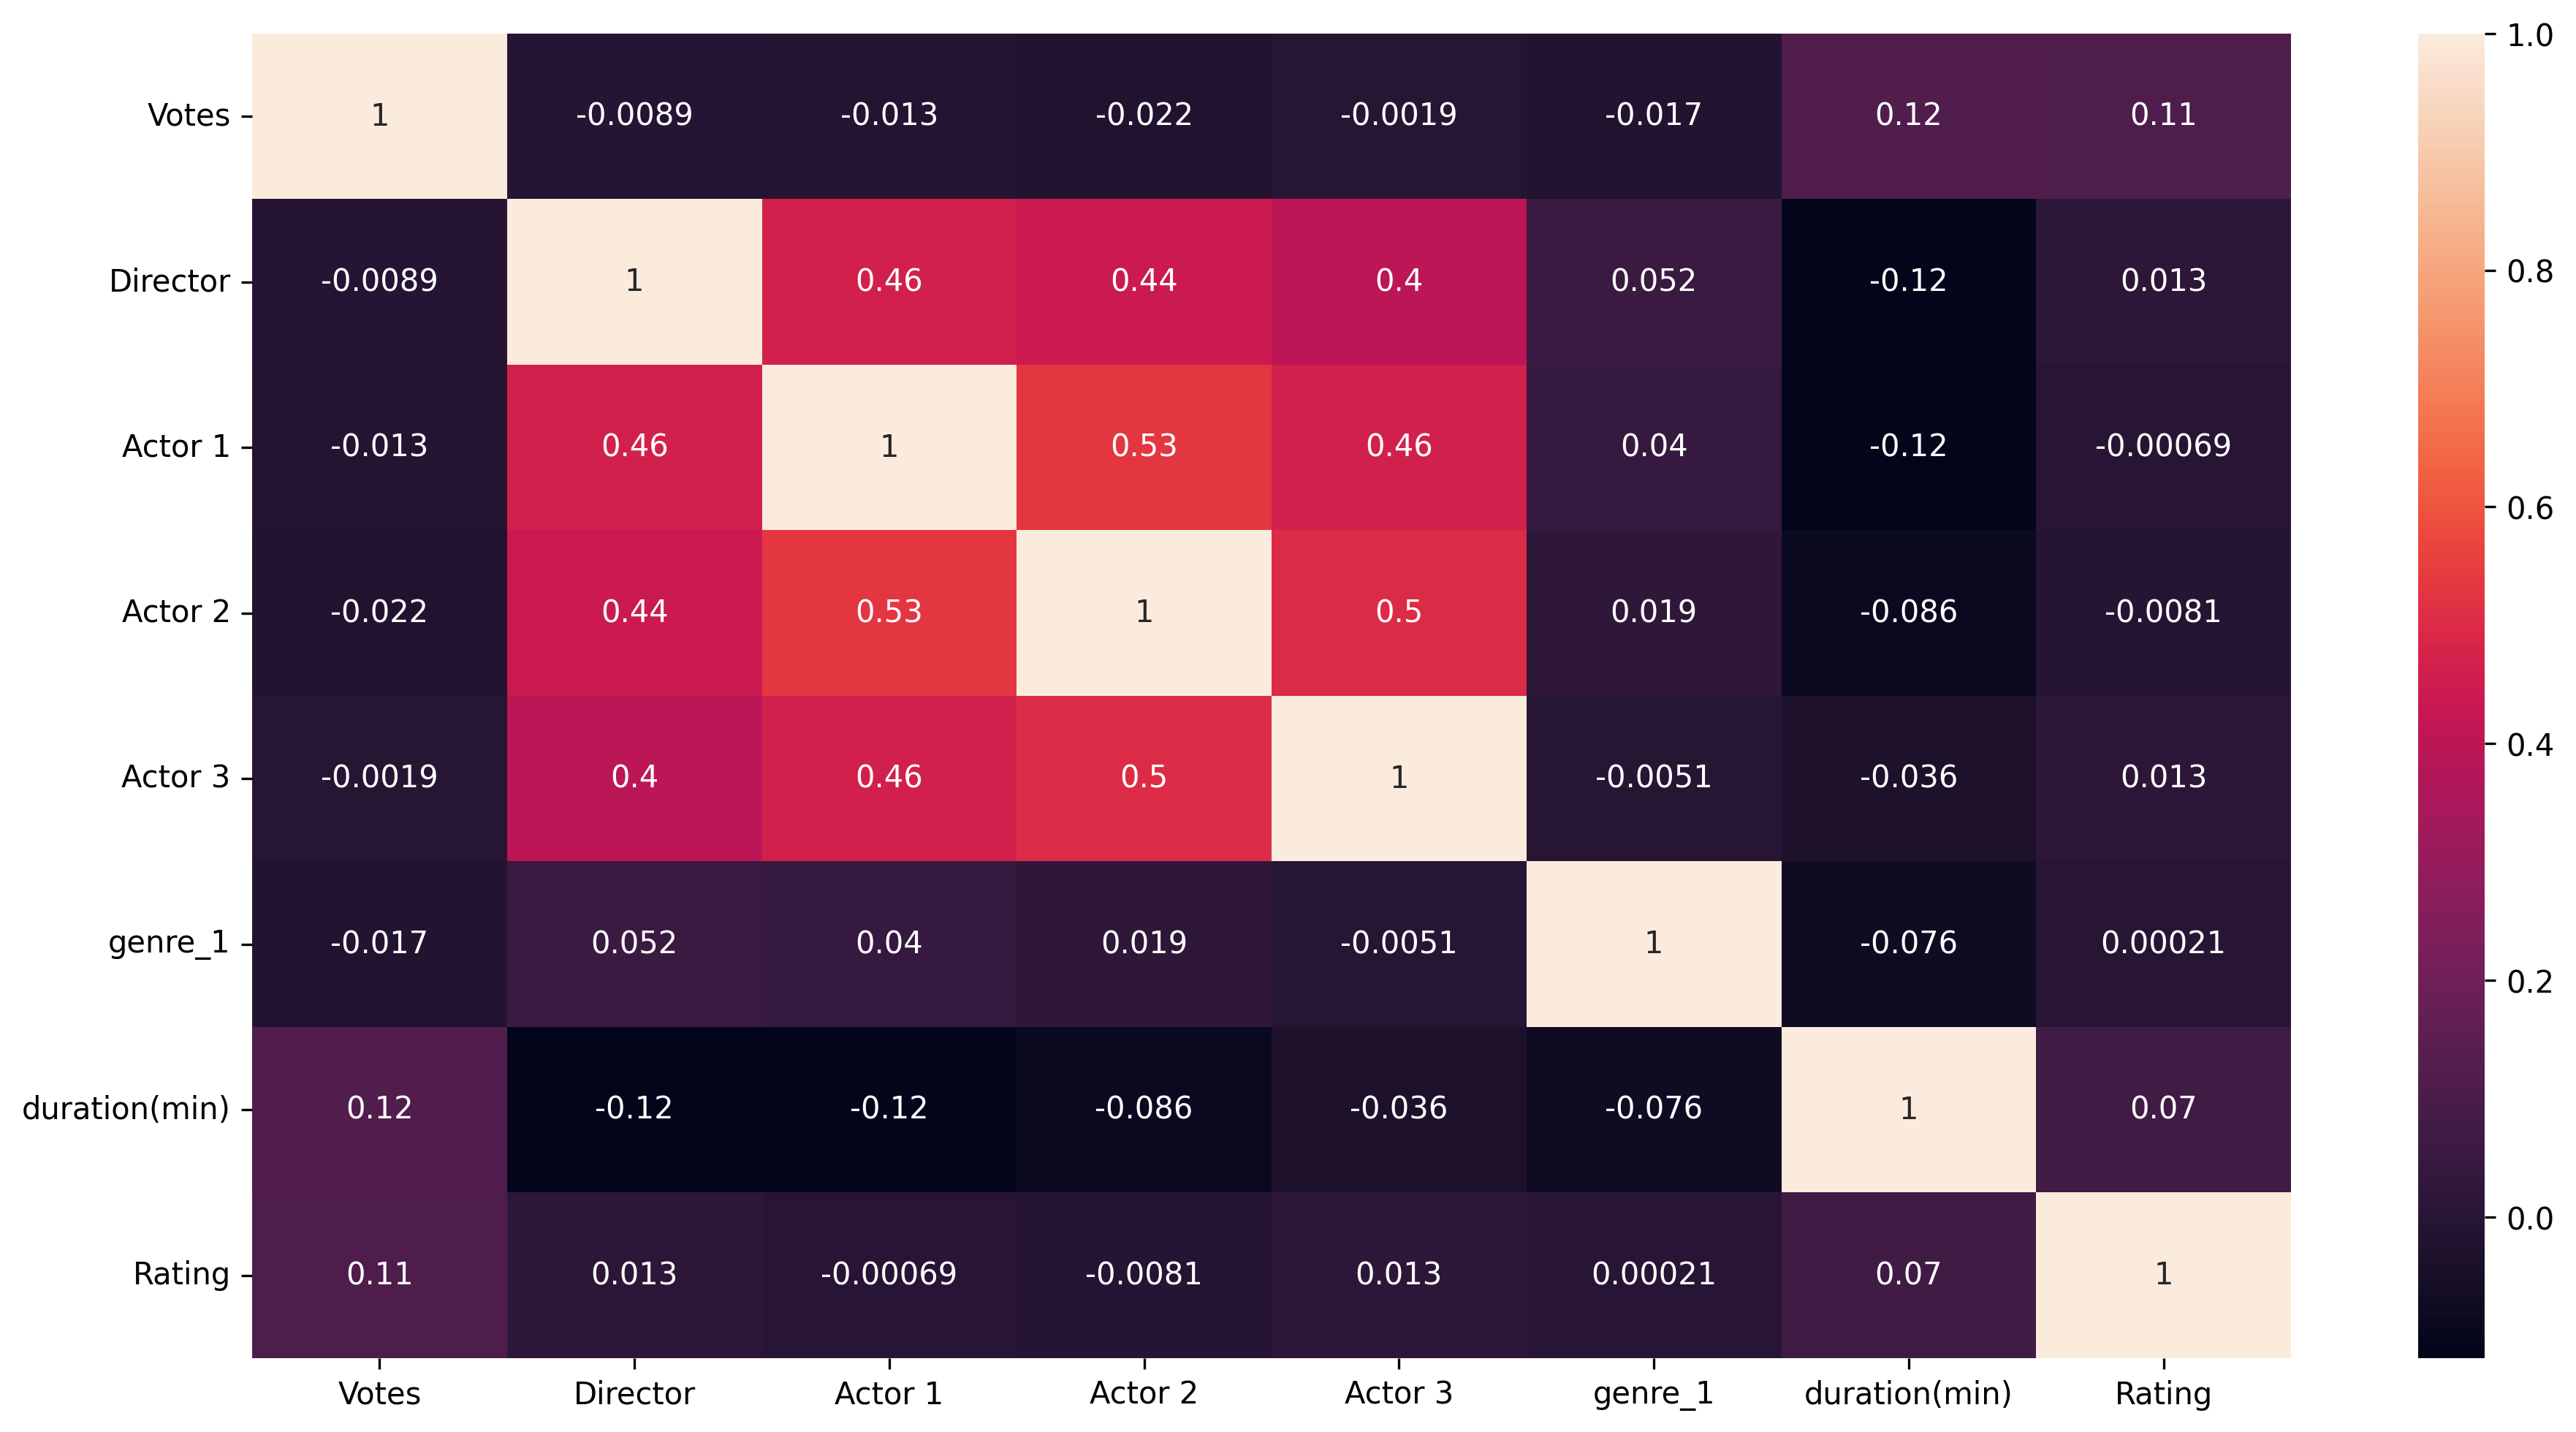

In [46]:
import seaborn as sns
fig=plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(df.corr(), annot = True)
plt.show()

In [47]:
x=df.iloc[:,0:7].values
y=df.iloc[:,7].values

In [48]:
x

array([[0, 0.0, 0.0, ..., 0.0, 0.0, 0],
       [8, 1.0, 1.0, ..., 1.0, 0.0, 109],
       [0, 2.0, 2.0, ..., 2.0, 0.0, 90],
       ...,
       [11, 3741.0, 59.0, ..., 4645.0, 3.0, 0],
       [655, 620.0, 106.0, ..., 463.0, 3.0, 129],
       [20, 220.0, 170.0, ..., 812.0, 3.0, 130]], dtype=object)

In [49]:
y

array([5.84145566, 7.        , 5.84145566, ..., 4.6       , 4.5       ,
       6.2       ])

#### Spliting the dataset

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [51]:
x_train

array([[0, 2103.0, 1677.0, ..., 1967.0, 0.0, 0],
       [0, 2314.0, 1852.0, ..., 2160.0, 0.0, 135],
       [7, 1768.0, 2467.0, ..., 2903.0, 3.0, 0],
       ...,
       [13, 4256.0, 297.0, ..., 463.0, 4.0, 0],
       [9, 2202.0, 13.0, ..., 26.0, 0.0, 0],
       [0, 825.0, 554.0, ..., 1609.0, 0.0, 111]], dtype=object)

In [52]:
x_test

array([[23, 250.0, 11.0, ..., 616.0, 3.0, 140],
       [18, 4758.0, 2165.0, ..., 1946.0, 3.0, 0],
       [0, 2363.0, 462.0, ..., 420.0, 0.0, 0],
       ...,
       [0, 652.0, 675.0, ..., 3866.0, 0.0, 133],
       [21178, 761.0, 641.0, ..., 3773.0, 0.0, 145],
       [510, 3809.0, 202.0, ..., 1541.0, 1.0, 109]], dtype=object)

In [53]:
y_train

array([5.84145566, 5.84145566, 5.9       , ..., 6.9       , 2.8       ,
       5.84145566])

In [54]:
y_test

array([5.1       , 5.1       , 5.84145566, ..., 5.84145566, 7.7       ,
       4.2       ])

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [56]:
y_pred= regressor.predict(x_test) 
print("predicted values :\n",y_pred)

predicted values :
 [5.85683438 5.77740532 5.73443319 ... 5.85119321 6.12772473 5.89651993]


In [63]:
print('R Squared: {:.2f}'.format(regressor.score(x_test,y_test)))

R Squared: 0.93


### Accuracy Score

In [61]:
regressor.score(x_test,y_test)

0.9340233841173884

### Predicting rating value Using random values

In [59]:
y_pred1 = regressor.predict([[44,437.0,216.0,2684.0,1299.0,3.0,125]])
print(y_pred1)

[5.83721175]
